In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('proyecto.csv')

In [4]:
data.shape

(440, 8)

In [6]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [9]:
indices = [26, 176, 392]

In [10]:
indices = [26, 176, 392]
muestras = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

In [11]:
data = data.drop(indices, axis = 0)

In [12]:
data = data.drop(['Region', 'Channel'], axis = 1)

In [14]:
muestras = muestras.drop(['Region', 'Channel'], axis = 1)

In [15]:
from sklearn import preprocessing
data_escalada = preprocessing.Normalizer().fit_transform(data)

In [16]:
muestra_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [17]:
from sklearn.cluster import KMeans

In [18]:
X = data_escalada.copy()

In [26]:
inercia = []
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++',
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    inercia.append(algoritmo,inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


NameError: name 'inertia_' is not defined

In [27]:
inercia = []
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++',
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    inercia.append(algoritmo.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


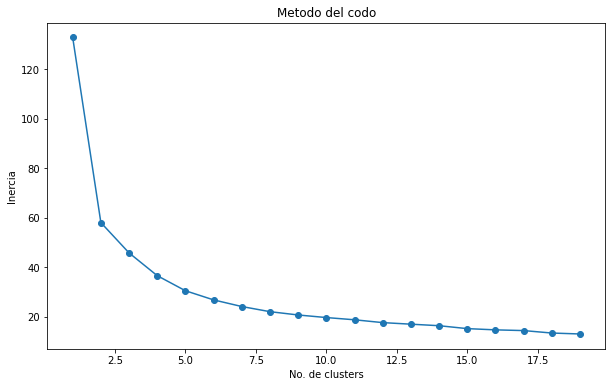

In [28]:
plt.figure(figsize=[10,6])
plt.title('Metodo del codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

In [29]:
algoritmo = KMeans(n_clusters = 6, init = 'k-means',
                  max_iter = 300, n_init = 10)

In [35]:
## Se aplica el algoritmo de clustering ##
#Se define el algoritmo junto con el valor de K
algoritmo = KMeans(n_clusters = 6, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

In [36]:
#Se entrena el algoritmo
algoritmo.fit(X)

KMeans(n_clusters=6)

In [37]:
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

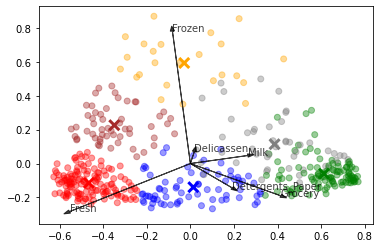

In [40]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 

#Se aplicar la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

# Se define los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']

#Se asignan los colores a cada clústeres
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]

#Se grafica los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)

#Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)

#Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns

#Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    #Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    #Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)

plt.show()